<a href="https://colab.research.google.com/github/vvilliscool/ML_LIB_Class_Goorm/blob/master/goorm_20220805.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/content/drive/MyDrive/goorm_project_class/data/t-academy/train (1).csv") 
test = pd.read_csv("/content/drive/MyDrive/goorm_project_class/data/t-academy/test (1).csv") 
sub = pd.read_csv("/content/drive/MyDrive/goorm_project_class/data/t-academy/sample_submission.csv") 

train.shape, test.shape, sub.shape

((26049, 16), (6512, 15), (6512, 2))

In [4]:
print("학습용 데이터 : ", train.shape)
print("테스트용 데이터 : ", test.shape)

학습용 데이터 :  (26049, 16)
테스트용 데이터 :  (6512, 15)


In [5]:
y = train['income']
test['income'] = "blank"

In [6]:
all_dat = pd.concat([train, test], axis=0)
print(all_dat.shape)

(32561, 16)


In [8]:
all_dat.income.value_counts()

<=50K    19744
blank     6512
>50K      6305
Name: income, dtype: int64

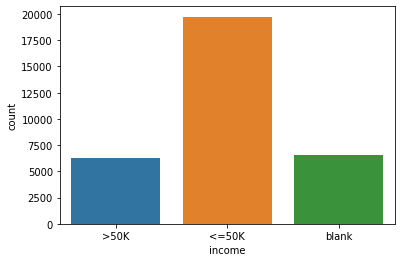

In [9]:
sns.countplot(x="income", data=all_dat)


In [10]:
### 데이터 전처리
### all_dat.loc[행조건, 열조건]

all_dat.loc[ all_dat['income']==">50K", 'target' ] = 1
all_dat.loc[ all_dat['income']=="<=50K", 'target' ] = 0
all_dat.loc[ all_dat['income']=="blank", 'target'] = 999
all_dat['target'] = all_dat['target'].astype("int")
all_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 6511
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  income          32561 non-null  object
 16  target          32561 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.5+ MB


In [11]:
sel_cat = ['workclass', 'education', 'marital_status',
           'occupation', 'relationship', 'race', 
           'sex', 'native_country' ]

X_cat = all_dat[sel_cat]
y = all_dat['target']



In [12]:
X_dummy = pd.get_dummies(X_cat)
X_dummy

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6508,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6509,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6510,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
all_dat_n = pd.concat([all_dat, X_dummy], axis=1)
all_dat_n

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,Private,61343,Bachelors,13,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6508,6508,41,Self-emp-inc,32185,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6509,6509,39,Private,409189,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,...,0,0,0,0,0,0,0,0,0,0
6510,6510,35,Private,180342,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,...,0,0,0,0,0,0,0,1,0,0


In [14]:
sel_cat = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
           'race', 'sex', 'native_country', 'income']

all_dat_n = all_dat_n.drop(sel_cat, axis=1)

In [15]:
train_n = all_dat_n.loc[ (all_dat_n['target']==0) | 
                        (all_dat_n['target']==1)  , : ]
test_n = all_dat_n.loc[ all_dat_n['target']==999  ,  : ]

In [16]:
print(train_n.shape, test_n.shape)

(26049, 110) (6512, 110)


In [17]:
X = train_n.drop(['target'], axis=1)
y = train_n['target']

test_X = test_n.drop(['target'], axis=1)

In [18]:
print(X.shape, y.shape, test_X.shape)

(26049, 109) (26049,) (6512, 109)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

sel = ['age', 'fnlwgt', 'capital_gain']

X_tr_all = X[sel]
y_tr_all = y
X_test_all = test_X[sel]

X_train, X_test, y_train, y_test = train_test_split(X_tr_all, y_tr_all,
                                                    test_size=0.3, random_state=77)